In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import cv2
import pathlib

In [46]:
data_dir = "F:/pymlnote/rice"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('F:/pymlnote/rice')

In [47]:
arborio = list(data_dir.glob('Arborio/*.jpg'))[:300]
basmati = list(data_dir.glob('Basmati/*.jpg'))[:300]
ipsala = list(data_dir.glob('Ipsala/*.jpg'))[:300]
jasmine = list(data_dir.glob('Jasmine/*.jpg'))[:300]
karacadag = list(data_dir.glob('Karacadag/*.jpg'))[:300]

In [48]:
df_images = {
    'arborio': arborio,
    'basmati': basmati,
    'ipsala': ipsala,
    'jasmine': jasmine,
    'karacadag': karacadag
}

df_labels = {
    'arborio': 0,
    'basmati': 1,
    'ipsala': 2,
    'jasmine': 3,
    'karacadag': 4
}


In [49]:
img = cv2.imread(str(df_images['arborio'][0]))
img.shape

(250, 250, 3)

In [50]:
X, y = [], []

for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (100, 100))
        X.append(img)
        y.append(df_labels[label])
        

In [51]:
x = np.array(X)
x = x/255.0
y = np.array(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax') 
])

model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 30000)             0         
                                                                 
 dense_13 (Dense)            (None, 512)               15360512  
                                                                 
 dense_14 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 15,363,077
Trainable params: 15,363,077
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

history = model.fit(x, y, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
47/47 [==============================] - 1s 14ms/step - loss: 1.3685 - Accuracy: 0.7920 - val_loss: 0.1234 - val_Accuracy: 0.9533
Epoch 2/20
47/47 [==============================] - 1s 11ms/step - loss: 0.1338 - Accuracy: 0.9573 - val_loss: 0.0730 - val_Accuracy: 0.9733
Epoch 3/20
47/47 [==============================] - 1s 11ms/step - loss: 0.1611 - Accuracy: 0.9500 - val_loss: 0.0980 - val_Accuracy: 0.9600
Epoch 4/20
47/47 [==============================] - 1s 12ms/step - loss: 0.1042 - Accuracy: 0.9633 - val_loss: 0.1950 - val_Accuracy: 0.9267
Epoch 5/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0948 - Accuracy: 0.9680 - val_loss: 0.0966 - val_Accuracy: 0.9533
Epoch 6/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0615 - Accuracy: 0.9787 - val_loss: 0.0197 - val_Accuracy: 0.9933
Epoch 7/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0324 - Accuracy: 0.9880 - val_loss: 0.0191 - val_Accuracy: 0.9933
Epoch 8/20
47

In [54]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.0088 - Accuracy: 0.9933


[0.008770051412284374, 0.9933333396911621]

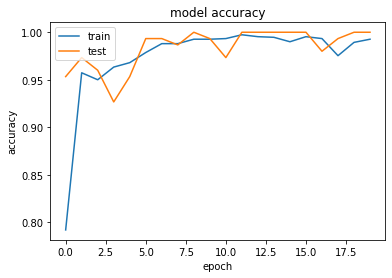

loss: 0.01576188951730728 accuracy: 0.9926666617393494


In [55]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('loss:', history.history['loss'][-1], 'accuracy:', history.history['Accuracy'][-1])


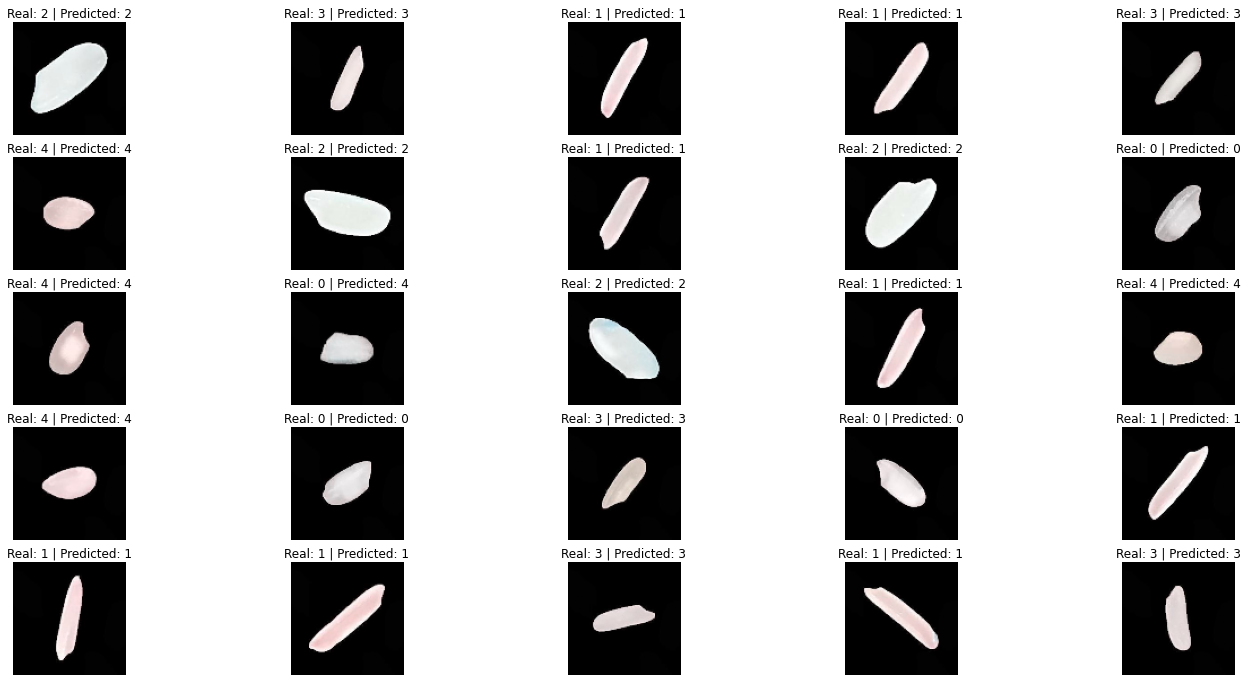

In [56]:
plt.figure(figsize=(24, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i])
    result = model.predict(X_test[i].reshape(1, 100, 100, 3))
    plt.title('Real: {} | Predicted: {}'.format(y_test[i], np.argmax(result)))
    plt.axis('off')
plt.show()
